In [1]:
%load_ext autoreload
%autoreload 2

from synchronization import plots
from synchronization import runner
from synchronization import analysis

/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/models
/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/plots_out


# Base Model of Single EI Population

Characteristics of base model
* rhythm with 30-40 Hz frequency -> gamma
* relatively synchronized, excitatory group is slightly desynchronized
* driven by PING rhythm, inhibition blocks excitation, once excitatory group fires inihibitory group follows immediately, and so on...
* low random background noise (mean voltage of 4.0 mV, $\sigma = .7$, $\tau = 1$)

This base model should show a PING mechanism. Activity should lie around 40 Hz and upwards, thus displaying gamma band activity.
Excitatory and inhibitory groups should be strongly synchronized.

No hyperbursts, no anomalies.

In [2]:
params = {
 "J_itoi": 3.0,
 "J_etoe": 0.1,
}

model = runner.run(modified_params=params, file_name="base")

Initializing net ...
Initialization time: 0.22050714492797852s
==== Running Network ... ====
WARNING    Note that the synaptic pathway 'synapses_1_pre' will run on the clock of the group 'neurongroup' using a dt of 5e-05. Either the Synapses object 'synapses_1' or the target 'neurongroup_1' (or both) are using a different dt. This might lead to unexpected results. In particular, all delays will be rounded to multiples of 5e-05. If in doubt, try to ensure that 'neurongroup', 'synapses_1', and 'neurongroup_1' use the same dt. [brian2.synapses.synapses.synapses_dt_mismatch]
WARNING    Note that the synaptic pathway 'synapses_2_pre' will run on the clock of the group 'neurongroup_1' using a dt of 5e-05. Either the Synapses object 'synapses_2' or the target 'neurongroup' (or both) are using a different dt. This might lead to unexpected results. In particular, all delays will be rounded to multiples of 5e-05. If in doubt, try to ensure that 'neurongroup_1', 'synapses_2', and 'neurongroup' us

In [3]:
if 'model' not in locals() or model is None:
    model = analysis.load_model("base")

Generate PSD plot ...


(<Figure size 576x216 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x130183690>)

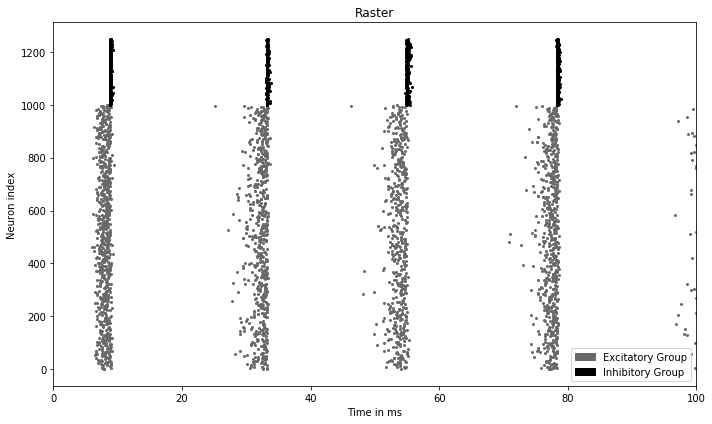

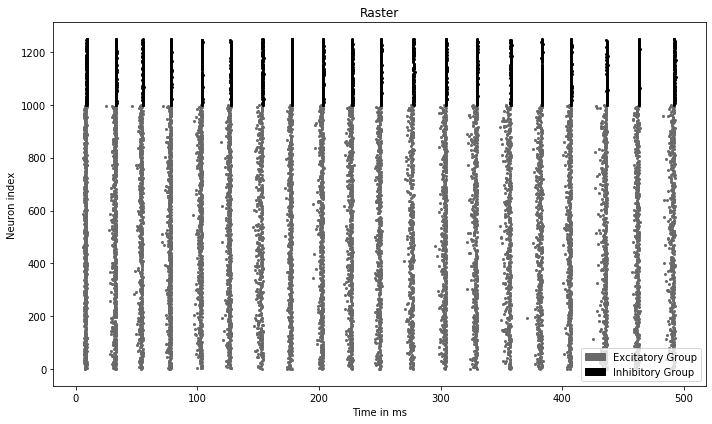

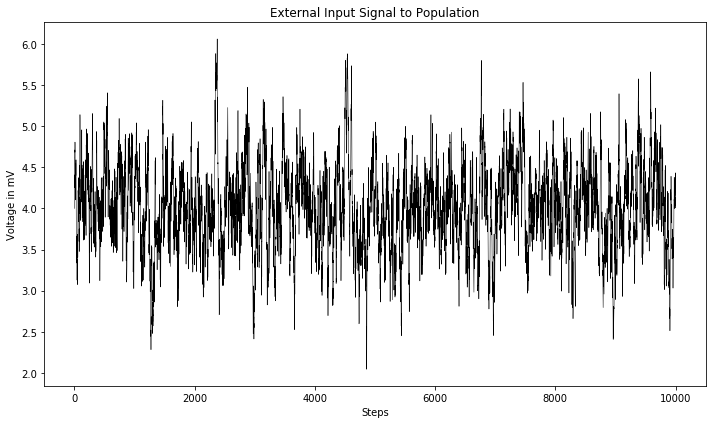

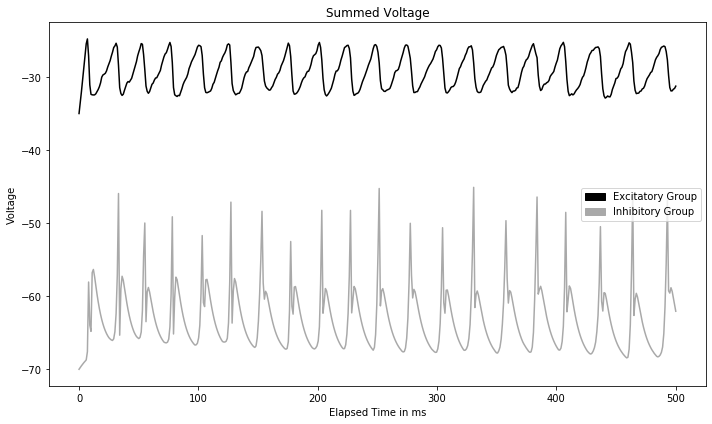

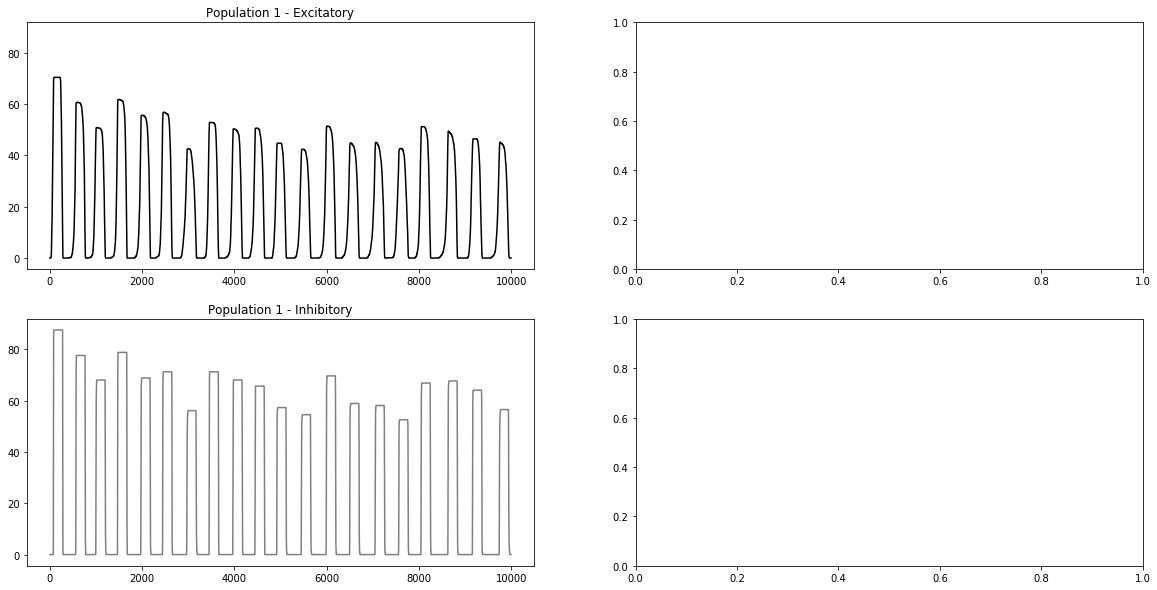

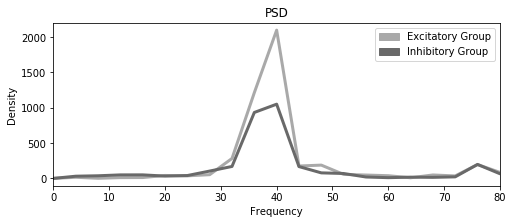

In [4]:
plots.raster(model=model, x_left=0, x_right=100)
plots.raster(model=model)
plots.ou_noise_by_params(params=model["params"])
plots.lfp(model=model)
plots.population_rates(model)
plots.psd(model, title="PSD")